In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_excel("dev_data/hop1_miss1_len10.xlsx")
df['target'] = df['tp'] - df['fp']

In [3]:
song_df = pd.read_excel("dev_data/song_stats.xlsx")
song_df

,name,duration_per_event,note_mean_song,velocity_mean
0,My Heart Will Go On,0.875210,64.842273,71.858164
1,不为谁而作的歌,0.569013,64.404178,85.519582
2,以父之名,0.310892,60.654142,85.776687
3,光年之外,0.477422,58.474719,69.866292
4,凉凉,0.609409,63.911572,78.446185
5,唯一,0.886601,59.748092,76.711450
6,想见你想见你想见你,0.402413,62.547852,80.944824
7,慢慢喜欢你,0.561103,60.329238,59.816339
8,明天会更好,0.423088,65.617190,79.398077
9,是妈妈是女儿,0.486369,66.301632,60.854811


<Axes: >

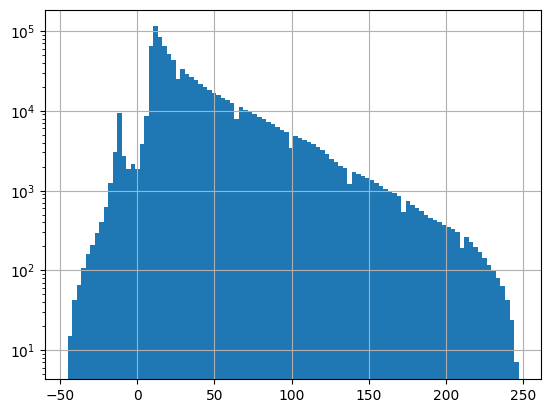

In [10]:
df["target"].hist(bins=100, log=True)

# EDA

In [21]:
(df["misses"]/df["length"]).describe()

count    893495.000000
mean          0.088109
std           0.106333
min           0.000000
25%           0.018750
50%           0.058824
75%           0.111111
max           0.923077
dtype: float64

<Axes: >

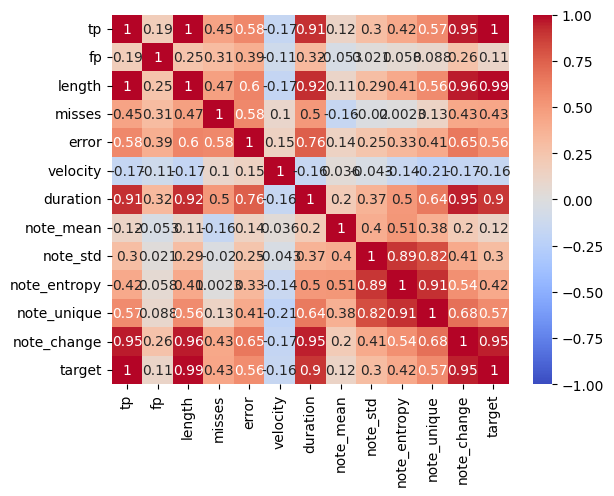

In [ ]:
# Compute the correlation matrix
corr_matrix = df.drop(columns=['name']).corr()

sns.heatmap(
    corr_matrix, 
    annot=True,     # Show the correlation coefficients
    cmap='coolwarm',# Color palette
    vmin=-1, vmax=1 # Range of correlation values
)

<Axes: >

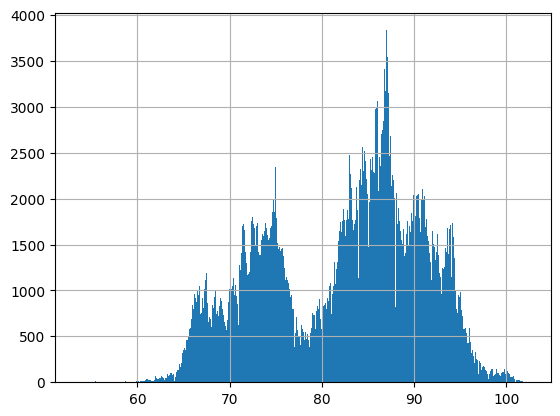

In [4]:
df['velocity'].hist(bins=1000)
# Velocity shows a multi-peak distribution
# Maybe the mean velocity is associated with piano performance

(0.0, 7000.0)

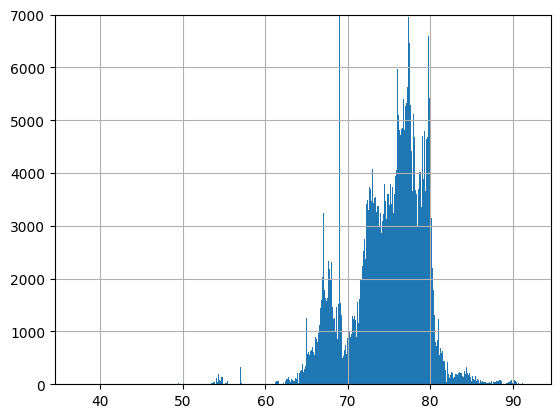

In [15]:
df['note_mean'].hist(bins=1000)
plt.ylim(top=7000)
# Also multi-peak
# Maybe associated with piano performance

Error vs duration: 0.7558923920733294


<Axes: xlabel='error', ylabel='duration'>

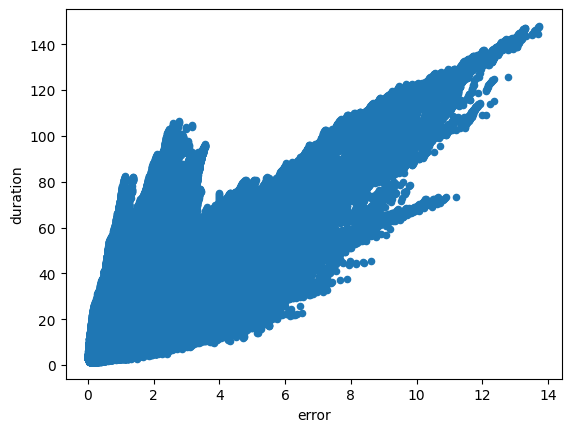

In [31]:
print(f"Error vs duration: {df['error'].corr(df['duration'])}")
df.plot.scatter("error", "duration")

Note entropy vs note unique: 0.9065487361055855
Note entropy vs log2(note unique): 0.9802599466401551


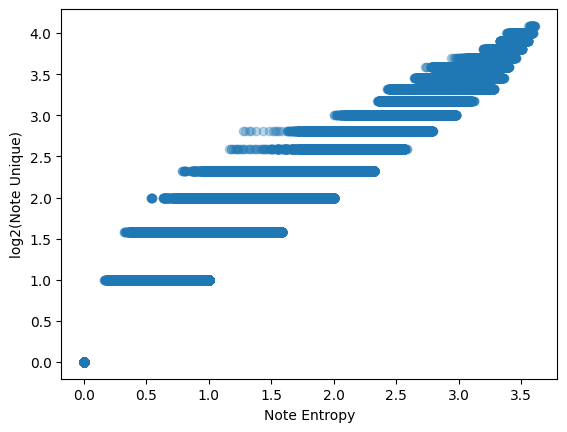

In [25]:
print(f"Note entropy vs note unique: {df['note_entropy'].corr(df['note_unique'])}")
print(f"Note entropy vs log2(note unique): {df['note_entropy'].corr(np.log2(df['note_unique']))}")
plt.scatter(df['note_entropy'], np.log2(df['note_unique']), alpha=0.3)
plt.xlabel('Note Entropy')
plt.ylabel('log2(Note Unique)')
plt.show()

Error vs duration: 0.9584662047168061


<Axes: xlabel='note_change', ylabel='length'>

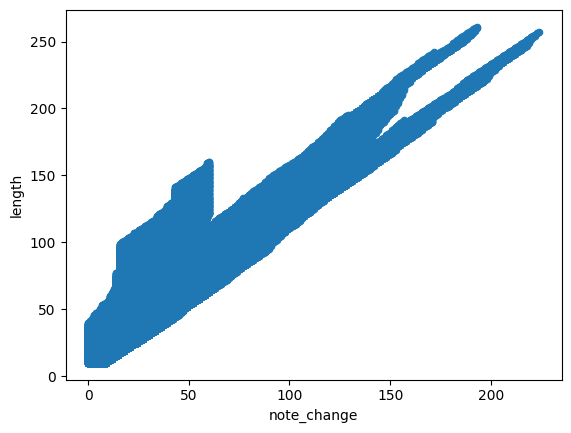

In [33]:
print(f"Error vs duration: {df['note_change'].corr(df['length'])}")
df.plot.scatter("note_change", "length")

In [ ]:
df.describe()

,tp,fp,length,misses,error,velocity,duration,note_mean,note_std,note_entropy,note_unique,note_change,target
count,893495.000000,893495.000000,893495.000000,893495.000000,893495.000000,893495.000000,893495.000000,893495.000000,893495.000000,893495.000000,893495.000000,893495.000000,893495.000000
mean,38.850346,1.112805,39.963151,2.430701,1.252656,82.330359,18.671340,74.383993,2.872046,2.155452,6.399135,27.416685,37.737541
std,36.199780,2.630273,36.780926,2.441649,1.400438,8.467623,18.481775,4.844561,1.311502,0.865507,2.975852,28.934900,35.802909
min,0.000000,0.000000,10.000000,0.000000,0.011719,53.500000,1.382812,37.200000,0.000000,0.000000,1.000000,0.000000,-45.000000
25%,14.000000,0.000000,15.000000,1.000000,0.398177,74.761905,6.359375,71.230385,2.272225,1.846439,5.000000,9.000000,14.000000
50%,25.000000,0.000000,25.000000,2.000000,0.850521,84.142857,11.944010,75.333333,3.042396,2.403107,6.000000,17.000000,24.000000
75%,51.000000,1.000000,52.000000,3.000000,1.608594,88.818182,24.123047,77.920000,3.638681,2.706891,8.000000,36.000000,51.000000
max,254.000000,45.000000,261.000000,16.000000,13.729688,102.363636,147.980729,91.900000,8.768694,3.607799,17.000000,224.000000,247.000000


# Data Preprocessing

In [35]:
# Apply preprocessing transformations
# Create a copy of the dataframe to preserve original data
df_processed = df.copy()

# Merge with song_df to get song-level statistics
# Assuming song_df has columns for mean velocity and mean note
# We'll need to identify the correct column names from the output above

# 1. Relative velocity: velocity / mean_velocity_of_original_song
# First, we need to merge with song_df to get song-level stats
song_stats = song_df.set_index('name') if 'name' in song_df.columns else song_df

# If song_df doesn't have a 'name' column, we might need to check the first column
if 'name' not in song_df.columns:
    # Assuming the first column contains song names
    song_stats = song_df.set_index(song_df.columns[0])

# Merge the dataframes
df_processed = df_processed.merge(song_stats, left_on='name', right_index=True, how='left')

# 1. Relative velocity (velocity / mean velocity of original song)
if 'velocity_mean' in df_processed.columns:
    df_processed['relative_velocity'] = df_processed['velocity'] / df_processed['velocity_mean']
else:
    print("Warning: Could not find mean velocity column in song_df")

# 2. Relative note mean (note_mean / mean note of original song)
if 'note_mean_song' in df_processed.columns:
    df_processed['relative_note_mean'] = df_processed['note_mean'] / df_processed['note_mean_song']
else:
    print("Warning: Could not find mean note column in song_df")

# 3. Relative duration per event (duration / length / duration_per_event)
if 'duration_per_event' in df_processed.columns:
    df_processed['relative_duration_per_event'] = df_processed['duration'] / df_processed['length'] / df_processed['duration_per_event']
    # 1 / df_processed['relative_duration_per_event'] for all < 1 values
    df_processed['relative_duration_per_event'] = df_processed['relative_duration_per_event'].where(
        df_processed['relative_duration_per_event'] >= 1, 1 / df_processed['relative_duration_per_event'])
else:
    print("Warning: Could not find duration per event column in song_df")

# 4. Normalized note entropy (note_entropy / log2(note_unique))
df_processed['normed_note_entropy'] = df_processed['note_entropy'] / np.log2(df_processed['note_unique'])
# Set NaN to 0
df_processed['normed_note_entropy'] = df_processed['normed_note_entropy'].fillna(0)

# 5. Normalized note change (note_change / length)
df_processed['normed_note_change'] = df_processed['note_change'] / df_processed['length']

# 6. Normalized misses (misses / length)
df_processed['normed_misses'] = df_processed['misses'] / df_processed['length']

# Display the new columns
print("Preprocessing completed!")
print("\nNew columns added:")
new_columns = ['relative_velocity', 'relative_note_mean', 'relative_duration_per_event', 'normed_note_entropy', 'normed_note_change', 'normed_misses']
for col in new_columns:
    if col in df_processed.columns:
        print(f"- {col}: created successfully")
        print(f"  Range: [{df_processed[col].min():.4f}, {df_processed[col].max():.4f}]")
        print(f"  Mean: {df_processed[col].mean():.4f}")
        print(f"  Std: {df_processed[col].std():.4f}")
    else:
        print(f"- {col}: NOT created (check column names)")

print(f"\nDataframe shape after preprocessing: {df_processed.shape}")
print(f"Original dataframe shape: {df.shape}")


Preprocessing completed!

New columns added:
- relative_velocity: created successfully
  Range: [0.7515, 1.3496]
  Mean: 1.1023
  Std: 0.0860
- relative_note_mean: created successfully
  Range: [0.5821, 1.5069]
  Mean: 1.1893
  Std: 0.0870
- relative_duration_per_event: created successfully
  Range: [1.0000, 4.7561]
  Mean: 1.2318
  Std: 0.2204
- normed_note_entropy: created successfully
  Range: [0.0000, 1.0000]
  Mean: 0.7962
  Std: 0.2645
- normed_note_change: created successfully
  Range: [0.0000, 0.9787]
  Mean: 0.6323
  Std: 0.2540
- normed_misses: created successfully
  Range: [0.0000, 0.9231]
  Mean: 0.0881
  Std: 0.1063

Dataframe shape after preprocessing: (893495, 23)
Original dataframe shape: (893495, 14)


# Linear Regression

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Select features (all columns except tp, fp, and target)
# features = ['length', 'normed_misses', 'error', 'velocity', 'relative_note_mean']
features = ['length', 'misses', 'error', 'velocity', 'duration',
       'note_mean', 'note_std', 'note_entropy', 'note_unique', 'note_change',
       'relative_velocity', 'relative_note_mean',
       'relative_duration_per_event', 'normed_note_entropy',
       'normed_note_change', 'normed_misses']

# 'note_std', 'normed_note_entropy', 'note_unique', 'error'
# 'normed_note_change', 'relative_duration_per_event'
# 'relative_velocity', 'misses', 'relative_note_mean'

# from sklearn.preprocessing import StandardScaler

X = df_processed[features]
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
y = df_processed['target']

print("Target variable (tp - fp) statistics:")
print(y.describe())
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")


Target variable (tp - fp) statistics:
count    893495.000000
mean         37.737541
std          35.802909
min         -45.000000
25%          14.000000
50%          24.000000
75%          51.000000
max         247.000000
Name: target, dtype: float64

Features shape: (893495, 16)
Target shape: (893495,)


In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Create and train the linear regression model
import xgboost as xgb
model = xgb.XGBRegressor()
# model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("\nModel trained successfully!")


Training set size: 714796
Testing set size: 178699

Model trained successfully!


In [51]:
model.save_model('xgb_hop1_miss1_len10_small.json')

=== Model Performance ===
Training R² Score: 0.9948
Testing R² Score: 0.9942
Training MSE: 6.6782
Testing MSE: 7.4457
Training MAE: 1.0180
Testing MAE: 1.0484
Training RMSE: 2.5842
Testing RMSE: 2.7287

=== Feature Importance (Coefficients) ===


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

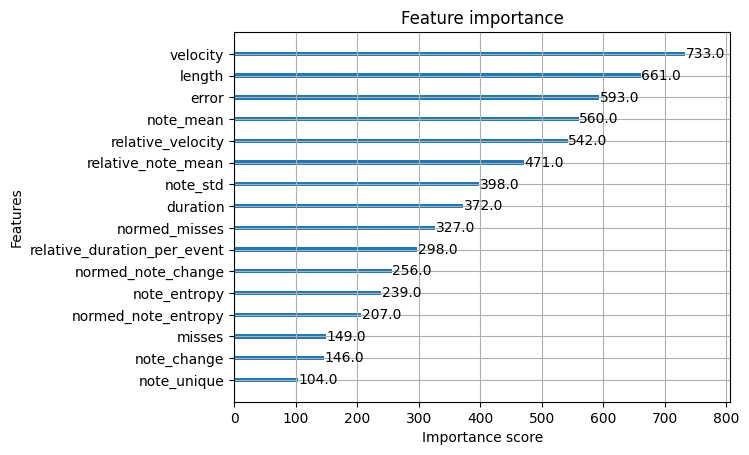

In [52]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("=== Model Performance ===")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Testing MAE: {test_mae:.4f}")
print(f"Training RMSE: {np.sqrt(train_mse):.4f}")
print(f"Testing RMSE: {np.sqrt(test_mse):.4f}")

# Feature importance (coefficients)
print("\n=== Feature Importance (Coefficients) ===")
# feature_importance = pd.DataFrame({
#     'feature': features,
#     'coefficient': model.coef_
# }).sort_values('coefficient', key=abs, ascending=False)

# print(feature_importance.to_string(index=False))
# print(f"\nIntercept: {model.intercept_}")
xgb.plot_importance(model)


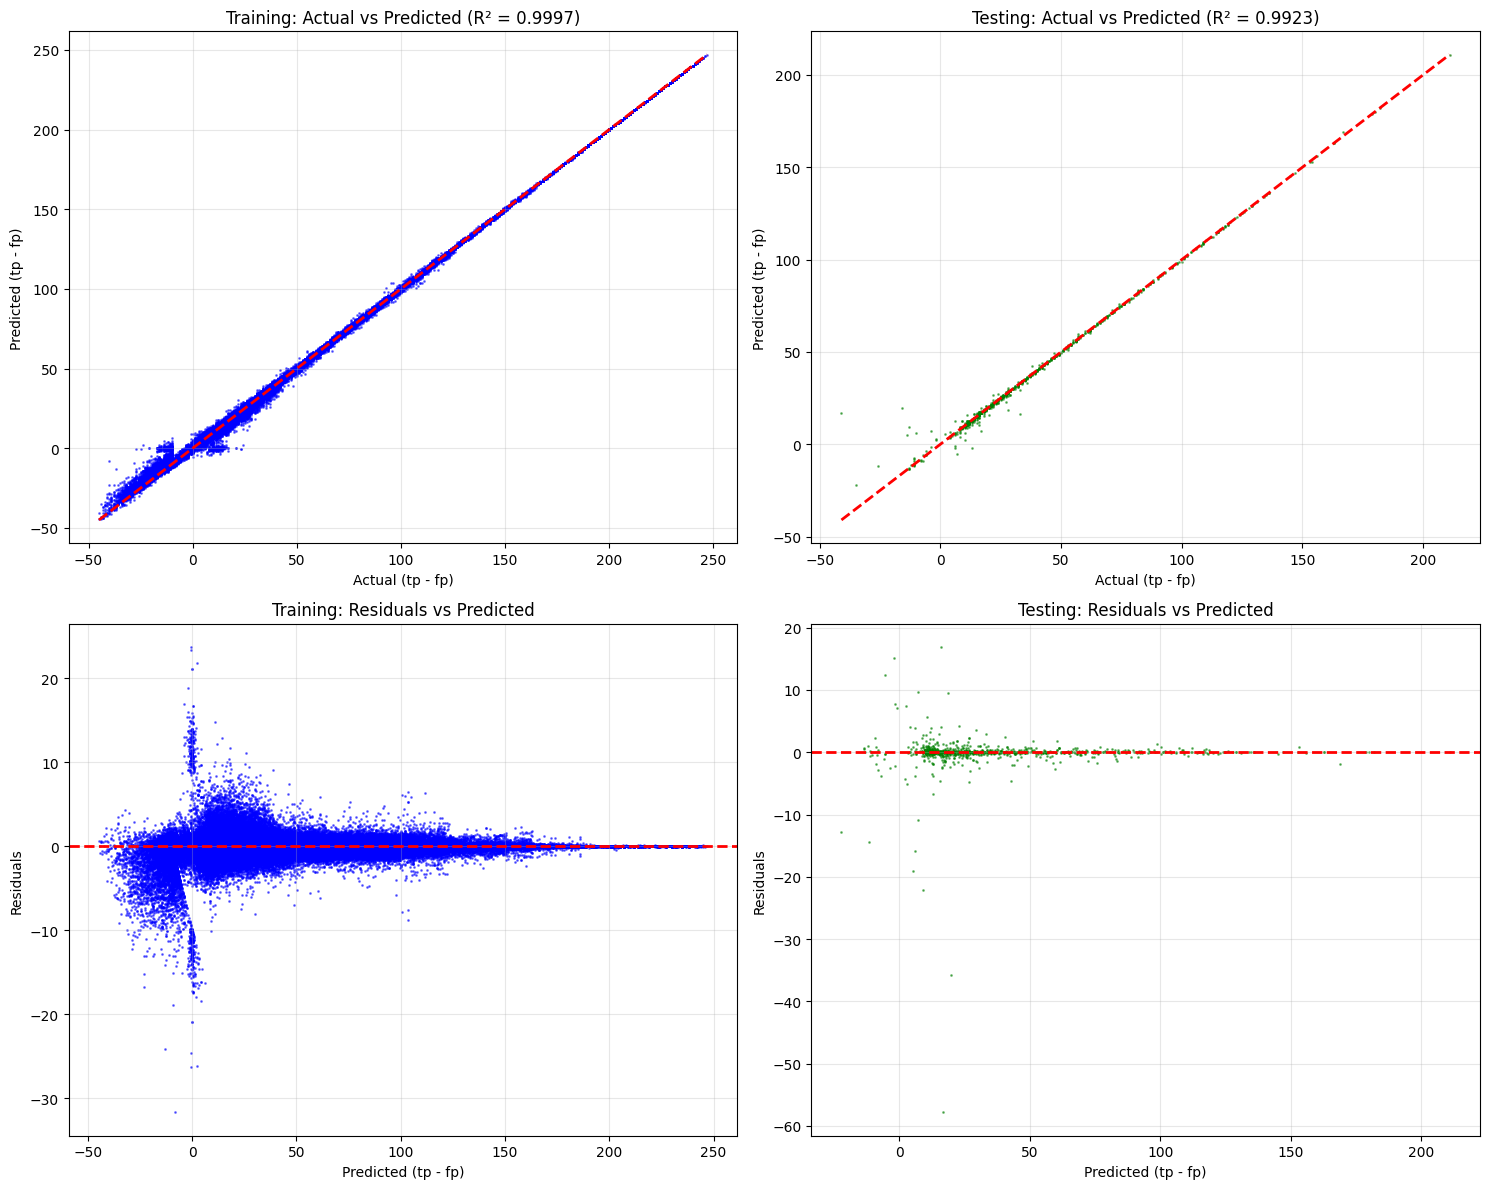

In [31]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.5, color='blue', s=1)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual (tp - fp)')
axes[0, 0].set_ylabel('Predicted (tp - fp)')
axes[0, 0].set_title(f'Training: Actual vs Predicted (R² = {train_r2:.4f})')
axes[0, 0].grid(True, alpha=0.3)

# 2. Actual vs Predicted (Testing)
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.5, color='green', s=1)
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual (tp - fp)')
axes[0, 1].set_ylabel('Predicted (tp - fp)')
axes[0, 1].set_title(f'Testing: Actual vs Predicted (R² = {test_r2:.4f})')
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuals (Training)
train_residuals = y_train - y_train_pred
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.5, color='blue', s=1)
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted (tp - fp)')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Training: Residuals vs Predicted')
axes[1, 0].grid(True, alpha=0.3)

# 4. Residuals (Testing)
test_residuals = y_test - y_test_pred
axes[1, 1].scatter(y_test_pred, test_residuals, alpha=0.5, color='green', s=1)
axes[1, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Predicted (tp - fp)')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Testing: Residuals vs Predicted')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [158]:
# Model Summary and Usage Example
print("=== LINEAR REGRESSION MODEL SUMMARY ===")
print(f"Model predicts: tp - fp (difference between true positives and false positives)")
print(f"Features used: {', '.join(features)}")
print(f"Training samples: {X_train.shape[0]:,}")
print(f"Test samples: {X_test.shape[0]:,}")
print(f"Model R² Score: {test_r2:.4f}")
print(f"Model RMSE: {np.sqrt(test_mse):.4f}")

print("\n=== EXAMPLE PREDICTION ===")
# Example prediction with the first test sample
sample_idx = 1
sample_features = X_test.iloc[sample_idx:sample_idx+1]
sample_prediction = model.predict(sample_features)[0]
actual_value = y_test.iloc[sample_idx]

print(f"Sample features:")
for i, feature in enumerate(features):
    print(f"  {feature}: {sample_features.iloc[0, i]:.4f}")
print(f"Predicted tp-fp: {sample_prediction:.4f}")
print(f"Actual tp-fp: {actual_value:.4f}")
print(f"Prediction error: {abs(sample_prediction - actual_value):.4f}")

print("\n=== MODEL EQUATION ===")
print(f"tp - fp = {model.intercept_:.4f}")
for i, feature in enumerate(features):
    sign = '+' if model.coef_[i] >= 0 else '-'
    print(f"  {sign} {abs(model.coef_[i]):.4f} * {feature}")


=== LINEAR REGRESSION MODEL SUMMARY ===
Model predicts: tp - fp (difference between true positives and false positives)
Features used: length, misses, error, velocity, relative_note_mean
Training samples: 714,796
Test samples: 178,699
Model R² Score: 0.9831
Model RMSE: 4.6333

=== EXAMPLE PREDICTION ===
Sample features:
  length: 45.0000
  misses: 0.0000
  error: 0.5076
  velocity: 74.5333
  relative_note_mean: 1.1969
Predicted tp-fp: 43.6205
Actual tp-fp: 45.0000
Prediction error: 1.3795

=== MODEL EQUATION ===
tp - fp = -23.1203
  + 1.0070 * length
  - 0.2611 * misses
  - 1.3482 * error
  + 0.1171 * velocity
  + 11.1822 * relative_note_mean
